# Workshop: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In this workshop, we will learn how to implement DBSCAN using Python. We will go through the following steps:

1. **Introduction to DBSCAN**
2. **Data Processing using `make_moons` dataset**
3. **Implementing DBSCAN**
4. **Evaluating the Model**



Step 1: Importing the Necessary Libraries

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


Step 2: Data Preparation

We'll use the make_moons dataset, which generates two interleaving half circles that are not linearly separable, perfect for testing DBSCAN.

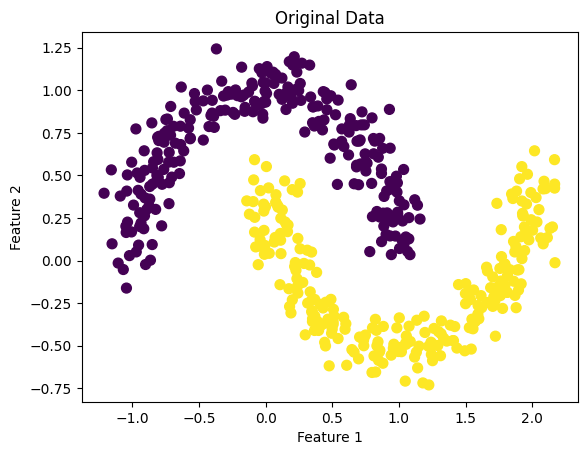

In [2]:
# Create the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Standardize the dataset for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Implementing DBSCAN

We now apply DBSCAN, a density-based clustering algorithm, which is capable of identifying clusters of arbitrary shapes.

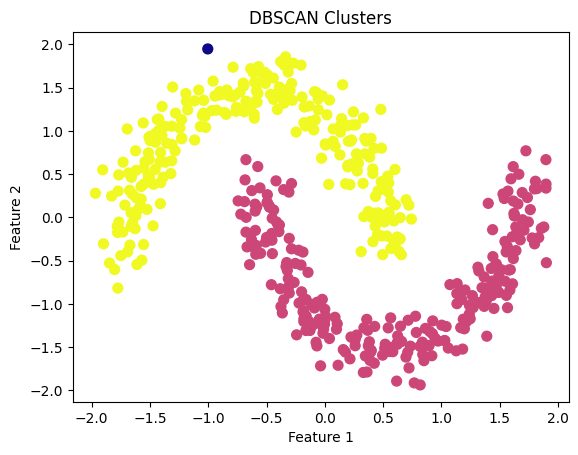

In [3]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# Get the labels
labels = dbscan.labels_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=50)
plt.title('DBSCAN Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Step 4: Evaluating the Model

Evaluation in DBSCAN can be tricky since it doesn’t assume labels as k-means does. One method is using the silhouette score, which evaluates how well-separated the clusters are.

In [4]:
# Evaluate clustering using Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette_avg:.2f}')

# Identifying noise points (labeled as -1)
n_noise = np.sum(labels == -1)
print(f'Number of noise points: {n_noise}')


Silhouette Score: 0.16
Number of noise points: 1


### Summary
 - We used the make_moons dataset, which contains two interleaving half circles.
 - We applied the DBSCAN algorithm, which is effective in detecting clusters of arbitrary shape.
 - We evaluated the model using the silhouette score and observed the number of noise points detected by DBSCAN.